# Face Mask Detection

###Objective:

The primary objective of this project is to develop a robust computer vision model using deep learning that detects whether a person in an image is wearing a face mask or not.
This solution aims to support public health compliance and automate safety monitoring in spaces affected by COVID-19 or other airborne illnesses.

In [ ]:
#loading necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import kagglehub
import warnings
warnings.filterwarnings("ignore")


In [ ]:
##Loading Face Mask Dataset from Kaggle
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")
print("Path to dataset files:", path)

100%|██████████| 163M/163M [00:50<00:00, 3.42MB/s] 

Extracting files...


Path to dataset files: C:\Users\Hp\.cache\kagglehub\datasets\omkargurav\face-mask-dataset\versions\1


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 68s 355ms/step - accuracy: 0.7223 - loss: 0.6079 - val_accuracy: 0.8397 - val_loss: 0.3901
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 72s 379ms/step - accuracy: 0.8206 - loss: 0.4139 - val_accuracy: 0.8510 - val_loss: 0.3812
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 62s 329ms/step - accuracy: 0.8367 - loss: 0.3774 - val_accuracy: 0.8530 - val_loss: 0.3540
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 62s 329ms/step - accuracy: 0.8478 - loss: 0.3486 - val_accuracy: 0.8662 - val_loss: 0.3169
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 65s 343ms/step - accuracy: 0.8585 - loss: 0.3307 - val_accuracy: 0.9040 - val_loss: 0.2666
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 62s 327ms/step - accuracy: 0.8741 - loss: 0.3046 - val_accuracy: 0.9093 - val_loss: 0.2322
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 73s 386ms/step - accuracy: 0.8838 - loss: 0.2878 - val_accuracy: 0.9020 - val_loss: 0.2356
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 91s 483ms/step - accuracy: 0.8962 - loss: 0

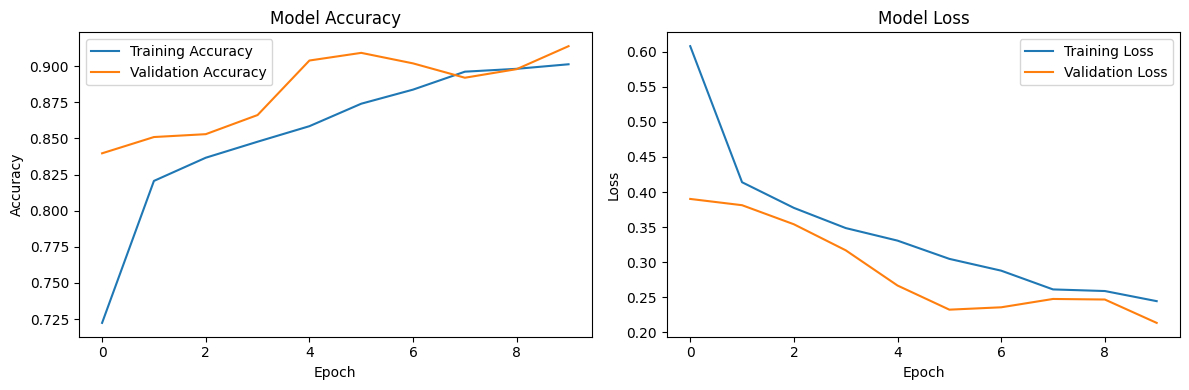

In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import shutil

# Data Preparation (Using your Kaggle Face Mask Detection Dataset path)
data_dir = r"C:\Users\Hp\.cache\kagglehub\datasets\omkargurav\face-mask-dataset\versions\1\data"

# Since both train and validation point to the same directory,
# we'll use data augmentation and split the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of data for validation
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Set as training data
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Set as validation data
)

# Model Architecture (from document)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Train Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Save the trained model
model.save('face_mask_detection_model.h5')

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Prediction Example
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_mask(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    # Adjust based on your class indices
    if prediction[0][0] > 0.5:
        label = 'Without Mask'
        confidence = prediction[0][0] * 100
    else:
        label = 'With Mask'
        confidence = (1 - prediction[0][0]) * 100

    print(f"Predicted: {label} (Confidence: {confidence:.2f}%)")
    return label, confidence



# Summary
- The project uses a publicly available image dataset, split into "with mask" and "without mask" categories, consisting of approximately 7,553 labeled images (6,043 for training and 1,510 for validation).

- Images were preprocessed via resizing, normalization, data augmentation (rotation, shift, flip), and split into training and validation sets using Keras' ImageDataGenerator.

- The model architecture is a Convolutional Neural Network (CNN) built with Keras, featuring:

- Two convolutional layers (32 and 64 filters)

MaxPooling layers

- A flatten layer

- Dense layers (128 neurons, plus final sigmoid for binary classification)

- Training was performed for 10 epochs, with the following metrics achieved:

- Best validation accuracy: ~91.4%

- Best training accuracy: ~90.1%

- Good validation loss (lowest at 0.213) indicating minimal overfitting.

- Model was saved for production use, and example code is provided for single-image prediction, outputting both label (“With Mask” or “Without Mask”) and confidence score.

# Final Results and Key Insights

Model Performance:

- Highest validation accuracy reached 91.4% at epoch 10, demonstrating strong generalization to new images.

- Consistent improvement in accuracy and loss across epochs, indicating effective learning and tuning.

Prediction Functionality:

- Deployed function accepts any image input and returns the predicted mask status along with its confidence—for actionable, real-time applications.

Main Strengths:

- Data augmentation ensures robustness to variations in orientation and lighting.

- CNN architecture leverages spatial features for high prediction reliability.

Practical Implications:

- The solution can be adapted for real-time deployment at entry points in buildings, workplaces, or public spaces.

- Fast and automated feedback allows security personnel or systems to take immediate action if mask compliance is breached.

# Actionable Recommendations

- Integrate the trained model into camera monitoring systems for on-premises, automated compliance checks.

- Expand dataset with more varied images to keep improving real-life accuracy.

- Periodically retrain the model and monitor for concept drift as mask styles and compliance change.

- Use the confidence score for threshold-based alerts—e.g., only flag alerts when the mask detection probability falls below a certain value.

